In [3]:
pip install matplotlib seaborn pillow

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e2/3c/5692a2d9a5ba848fda3f48d2b607037df96460b941a59ef236404b39776b/matplotlib-3.10.7-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/32/5c/1ee32d1c7956923202f00cf8d2a14a62ed7517bdc0ee1e55301227fc273c/contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/pac

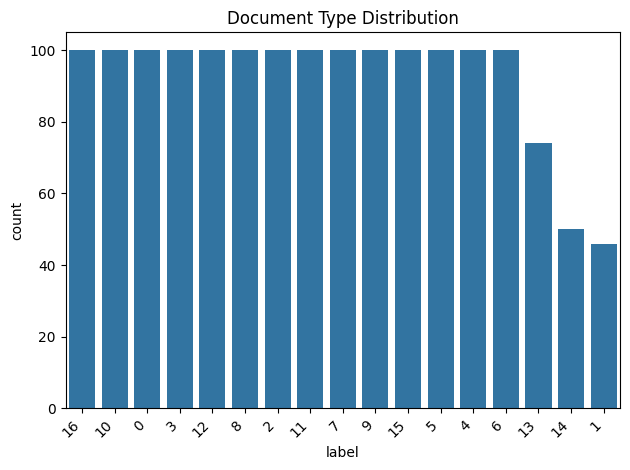

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = '/root/cv_project/data/train.csv'

# 1) 구분자/인코딩 자동 감지 + BOM 제거
df = pd.read_csv(csv_path, sep=None, engine='python', encoding='utf-8-sig')

# 2) 컬럼명 공백/개행 제거
df.columns = df.columns.str.strip()

# 3) label 컬럼 자동 탐색/정규화
candidate_names = ['label', 'target', 'class', 'category', 'doc_type', 'document_type', 'y']
found = None
for c in candidate_names:
    if c in df.columns:
        found = c
        break

# 4) 못 찾으면 마지막 컬럼을 label로 가정(보통 id, label 구조일 때 유효)
if found is None:
    if df.shape[1] >= 2:
        found = df.columns[-1]   # 마지막 열이 정답 레이블일 확률이 높음
    else:
        raise ValueError(f'레이블 컬럼을 찾을 수 없습니다. df.columns={list(df.columns)}')

if found != 'label':
    df = df.rename(columns={found: 'label'})

# 5) label NaN/공백 처리(옵션)
df['label'] = df['label'].astype(str).str.strip()

# 6) 시각화 (빈도 높은 순 정렬)
order = df['label'].value_counts().index
sns.countplot(x='label', data=df, order=order)
plt.xticks(rotation=45, ha='right')
plt.title('Document Type Distribution')
plt.tight_layout()
plt.show()


In [10]:
print(df.head())
print(df.columns.tolist())


                     ID label
0  002f99746285dfdd.jpg    16
1  008ccd231e1fea5d.jpg    10
2  008f5911bfda7695.jpg    10
3  009235e4c9c07af5.jpg     4
4  00b2f44967580c74.jpg    16
['ID', 'label']


In [5]:
!head -n 3 /root/cv_project/data/train.csv

ID,target
002f99746285dfdd.jpg,16
008ccd231e1fea5d.jpg,10


shape: (1570, 2)
raw columns: ['ID', 'target']
cleaned columns: ['ID', 'target']


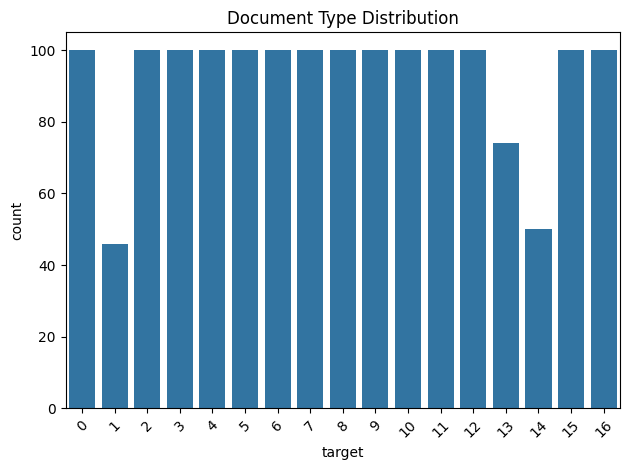

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/root/cv_project/data/train.csv'
df = pd.read_csv(path)

print("shape:", df.shape)
print("raw columns:", df.columns.tolist())

# 1) 컬럼명 정리(앞뒤 공백 제거, BOM 제거, 소문자화)
df.columns = df.columns.str.replace('\ufeff', '', regex=False).str.strip()

print("cleaned columns:", df.columns.tolist())

# 2) 구분자 문제 자동 탐지 시도: 컬럼이 1개뿐이면 ; 로 다시 읽기
if df.shape[1] == 1:
    df = pd.read_csv(path, sep=';')
    df.columns = df.columns.str.replace('\ufeff', '', regex=False).str.strip()
    print("re-read with ';' → columns:", df.columns.tolist())

# 3) label 컬럼 후보 찾기
candidates = ['label', 'target', 'class', 'category', 'y']
label_col = next((c for c in candidates if c in df.columns), None)

if label_col is None:
    raise ValueError(
        f"레이블 컬럼을 못 찾았습니다. 현재 컬럼: {df.columns.tolist()} "
        "→ CSV에서 라벨 컬럼명이 무엇인지 확인해주세요."
    )

# 4) 분포 그리기
plt.figure()
sns.countplot(x=label_col, data=df)
plt.xticks(rotation=45)
plt.title('Document Type Distribution')
plt.tight_layout()
plt.show()


In [3]:
import os, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# 데이터셋 로드
df = pd.read_csv('/root/cv_project/data/train.csv')  # id, label
img_dir = '/root/cv_project/data/train/'

# 클래스 분포
sns.countplot(x='label', data=df)
plt.xticks(rotation=45)
plt.title('Document Type Distribution')
plt.show()


ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.